In [2]:
df['dist_ferry_quant'] = pd.qcut(df['dist_ferry'],q=20)

In [3]:
global_mean = df['price'].mean()
correct = lambda x : x*global_mean/x.mean()
df['corr_price']=df[['dist_ferry_quant','price']].groupby('dist_ferry_quant')['price'].transform(correct)

In [4]:
X = np.array(df[featureList])
y = np.array(df['corr_price'].astype('float'))

In [16]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

RANDOM_STATE = 123
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features='log2'",
        RandomForestRegressor(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a Regressor name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1,10):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))



//anaconda/envs/my_projects_env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/envs/my_projects_env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda/envs/my_projects_env/lib/python3.5/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [36]:
# # Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

NameError: name 'error_rate' is not defined

In [37]:
M_train = int(len(df.index)*0.8)
train_rows = np.random.choice(df.index.values,M_train)
df_train = df.ix[train_rows]
df_test = df.drop(train_rows)

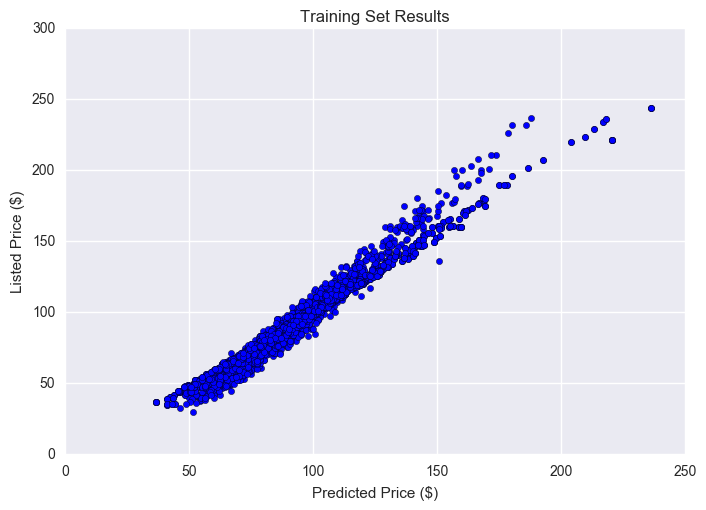

In [39]:
X = np.array(df_train[featureList])
Y = np.array(df_train['corr_price'].astype('float'))
forest=RandomForestRegressor(n_estimators=1000,max_features='log2',n_jobs=-1)
forest.fit(X,Y)
df['pred_price']=forest.predict(df[featureList])
plt.scatter(df.ix[train_rows]['pred_price'],df.ix[train_rows]['corr_price'])
plt.title('Training Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

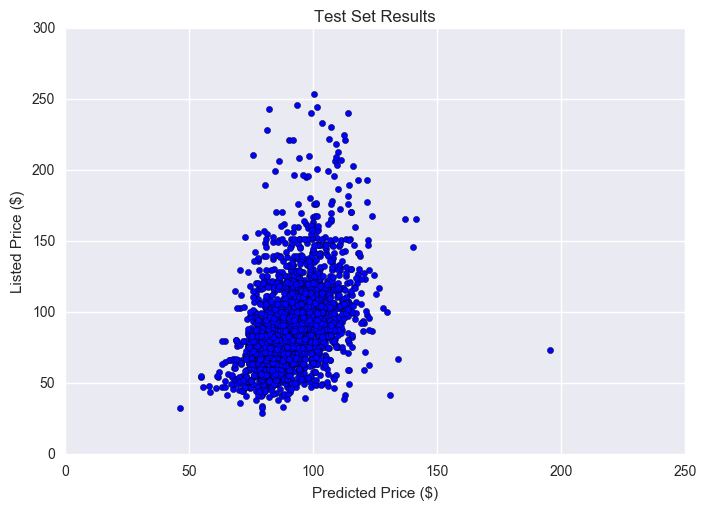

In [40]:
plt.scatter(df.drop(train_rows)['pred_price'],df.drop(train_rows)['corr_price'])
plt.title('Test Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

In [41]:
import scipy

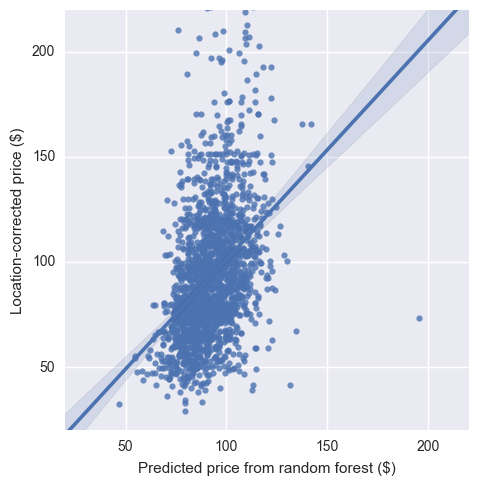

In [42]:
sns.lmplot('pred_price','corr_price',df.drop(train_rows));
plt.xlabel('Predicted price from random forest ($)')
plt.ylabel('Location-corrected price ($)')
plt.ylim([20,220])
plt.xlim([20,220]);

In [43]:
x=df.drop(train_rows)['pred_price']
y=df.drop(train_rows)['corr_price']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(slope,intercept,r_value**2,p_value,std_err)

1.04325020921 -3.05616860596 0.155376269305 4.09259427982e-75 0.0544983192054


Feature ranking:
1. bin_num_beds (0.034773)
2. bin_loc_rating (0.030518)
3. bin_host_other_rev_count (0.027771)
4. bin_person_cap (0.026554)
5. bin_cleanliness_rating (0.024877)
6. bin_guest_sat (0.024377)
7. amen_1 (0.024321)
8. bin_review_count (0.024241)
9. amen_9 (0.023579)
10. amen_2 (0.022796)
11. amen_47 (0.022382)
12. bin_cancel_policy (0.022310)
13. amen_42 (0.022180)
14. amen_3 (0.022023)
15. amen_8 (0.021683)
16. bin_is_apt (0.021558)
17. amen_39 (0.021408)
18. amen_37 (0.021285)
19. amen_43 (0.020773)
20. amen_50 (0.020452)
21. bin_instant_book (0.020202)
22. amen_36 (0.019831)
23. amen_31 (0.019807)
24. bin_value_rating (0.019740)
25. amen_46 (0.019521)
26. amen_44 (0.019433)
27. amen_34 (0.019402)
28. amen_41 (0.019258)
29. amen_33 (0.019252)
30. amen_45 (0.019088)
31. amen_49 (0.017968)
32. amen_27 (0.017303)
33. amen_16 (0.017128)
34. amen_38 (0.017080)
35. amen_17 (0.016767)
36. amen_40 (0.015788)
37. amen_30 (0.015441)
38. bin_checkin_rating (0.014850)
39. amen_5 (0.0

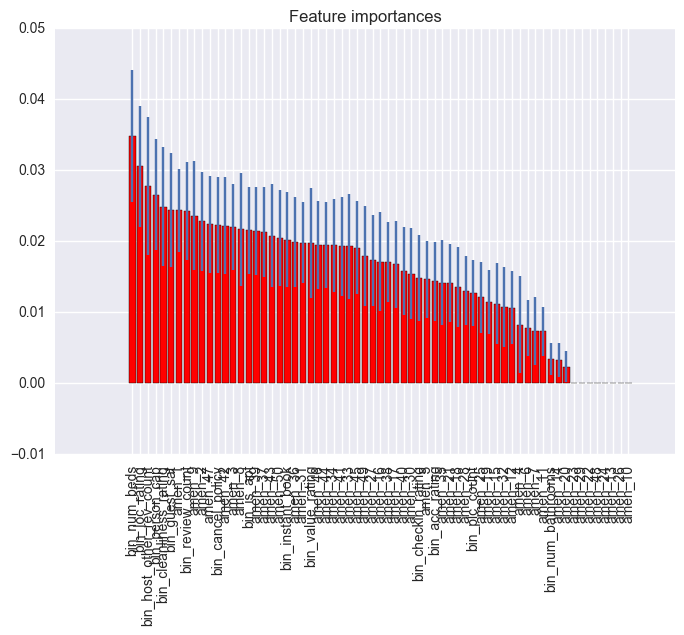

In [35]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#num_feat=20
#indices=indices[:num_feat]
# Print the feature ranking
print("Feature ranking:")
importance_dict = {}
features_20 = []
for f in range(X.shape[1]):
    print("%i. %s (%f)" % (f+1,featureList[indices[f]], importances[indices[f]]))
    importance_dict[featureList[indices[f]]] = importances[indices[f]]
    features_20.append(featureList[indices[f]])
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
      color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [featureList[i] for i in indices],rotation=90)
plt.show()

In [39]:
amen_name_dict = joblib.load('static/amen_name_dict.pkl')
pprint.pprint(amen_name_dict)

{1: 'TV',
 2: 'Cable TV',
 3: 'Internet',
 4: 'Wireless Internet',
 5: 'Air conditioning',
 6: 'Wheelchair accessible',
 7: 'Pool',
 8: 'Kitchen',
 9: 'Free parking on premises',
 10: 'Paid parking off premises',
 11: 'Smoking allowed',
 12: 'Pets allowed',
 14: 'Doorman',
 15: 'Gym',
 16: 'Breakfast',
 21: 'Elevator in building',
 23: 'Free parking on street',
 25: 'Hot tub',
 27: 'Indoor fireplace',
 28: 'Buzzer/wireless intercom',
 30: 'Heating',
 31: 'Family/kid friendly',
 32: 'Suitable for events',
 33: 'Washer',
 34: 'Dryer',
 35: 'Smoke detector',
 36: 'Carbon monoxide detector',
 37: 'First aid kit',
 38: 'Safety card',
 39: 'Fire extinguisher',
 40: 'Essentials',
 41: 'Shampoo',
 42: 'Lock on bedroom door',
 43: '24-hour check-in',
 44: 'Hangers',
 45: 'Hair dryer',
 46: 'Iron',
 47: 'Laptop friendly workspace',
 56: 'Private living room',
 57: 'Private entrance'}


In [39]:
features_20=features_20[:20]

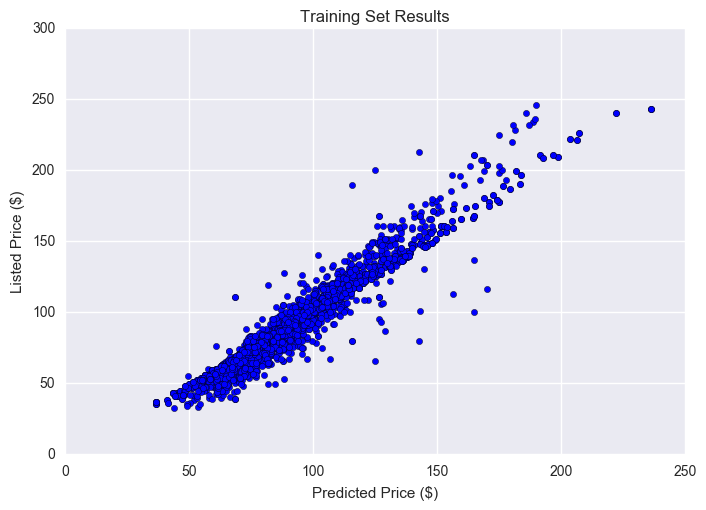

In [47]:
X = np.array(df_train[features_20])
Y = np.array(df_train['corr_price'].astype('float'))
forest=RandomForestRegressor(n_estimators=1000,max_features='log2',n_jobs=-1)
forest.fit(X,Y)
df['pred_price']=forest.predict(df[features_20])
plt.scatter(df.ix[train_rows]['pred_price'],df.ix[train_rows]['corr_price'])
plt.title('Training Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

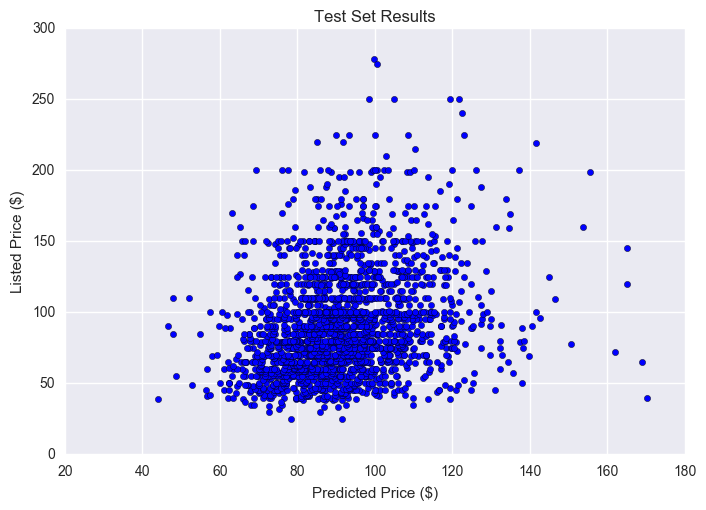

In [48]:
plt.scatter(df.drop(train_rows)['pred_price'],df.drop(train_rows)['price'])
plt.title('Test Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

In [50]:
#fit line to test set
x=df.drop(train_rows)['pred_price']
y=df.drop(train_rows)['corr_price']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(slope,intercept,r_value**2,p_value,std_err)

0.614723715749 35.5590381049 0.0885601042222 3.91453325639e-43 0.0436092150917


In [55]:
df[df.corr_price > 2.5*df.pred_price]

,acc_rating,amen_1,amen_10,amen_11,amen_12,amen_13,amen_14,amen_15,amen_16,amen_17,...,bin_num_bathrooms,bin_communication_rating,bin_value_rating,bin_person_cap,bin_review_count,bin_is_apt,bin_instant_book,dist_ferry_quant,corr_price,pred_price
12967003,10.0,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,True,False,"(0.129, 0.138]",181.921757,64.520863
8237402,10.0,False,False,False,False,False,False,False,False,True,...,True,True,True,True,False,False,False,"(0.129, 0.138]",194.916169,71.784276
6731942,10.0,False,False,False,False,False,False,True,False,True,...,True,True,True,True,False,False,False,"(0.129, 0.138]",244.294931,87.321626
15099424,10.0,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,"(0.0886, 0.105]",243.492688,85.140690


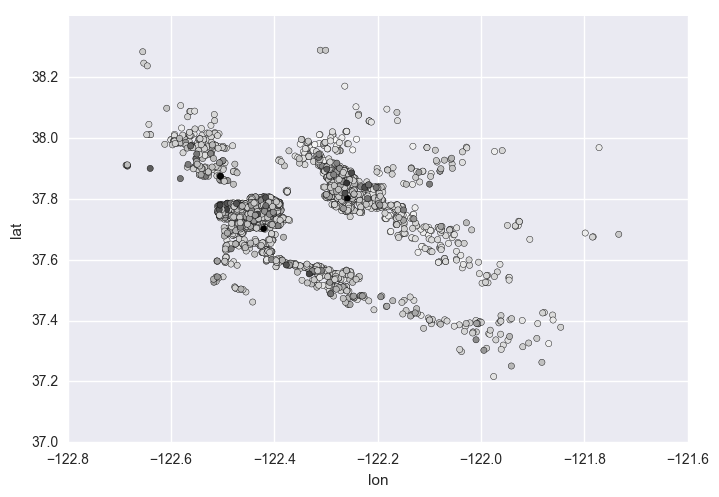

In [61]:
df.plot(x='lon',y='lat',kind='scatter',c=(df['corr_price']-df['pred_price'])/df['pred_price']);

In [63]:
df['pred_error'] = (df['pred_price']-df['corr_price'])/df['corr_price']

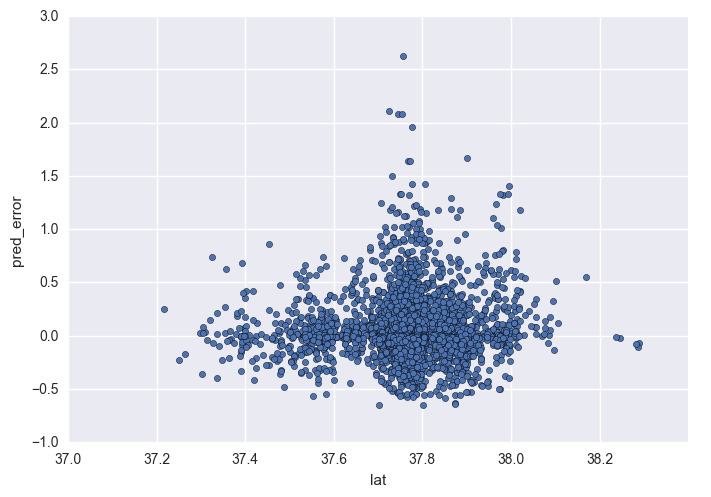

In [67]:
df.plot(x='lat',y='pred_error',kind='scatter');

2245

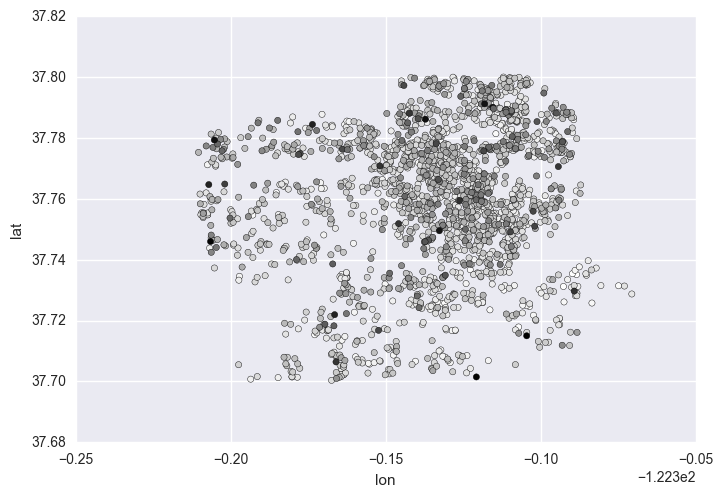

In [91]:
df_SF = df[df.lat<37.8]
df_SF = df_SF[df_SF.lat>37.7]
df_SF = df_SF[df_SF.lon<-122.3]
M_train = int(len(df.index)*0.75)
train_rows = np.random.choice(df.index.values,M_train)
df_train = df.ix[train_rows]
df_test = df.drop(train_rows)df_SF.plot(x='lon',y='lat',kind='scatter',c=df_SF['corr_price']/55)
len(df_SF.index)

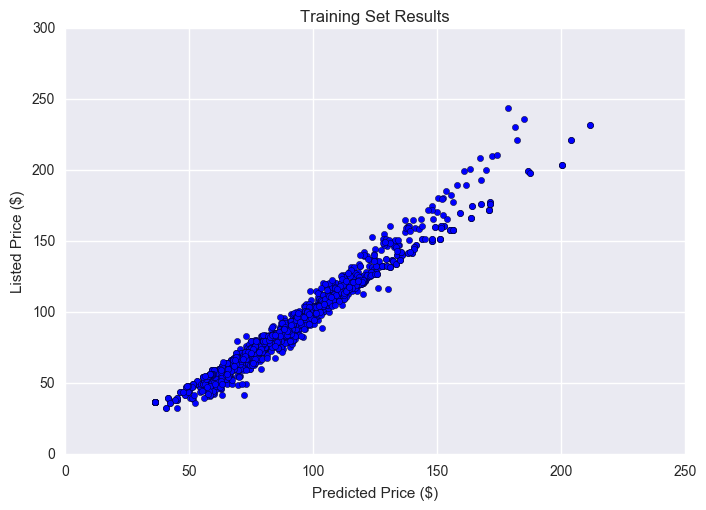

In [93]:
M_train = int(len(df_SF.index)*0.8)
train_rows = np.random.choice(df_SF.index.values,M_train)
df_train = df.ix[train_rows]
df_test = df.drop(train_rows)

X = np.array(df_train[featureList])
Y = np.array(df_train['corr_price'].astype('float'))
forest=RandomForestRegressor(n_estimators=1000,max_features='log2',n_jobs=-1)
forest.fit(X,Y)
df_SF['pred_price']=forest.predict(df_SF[featureList])
plt.scatter(df_SF.ix[train_rows]['pred_price'],df_SF.ix[train_rows]['corr_price'])
plt.title('Training Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

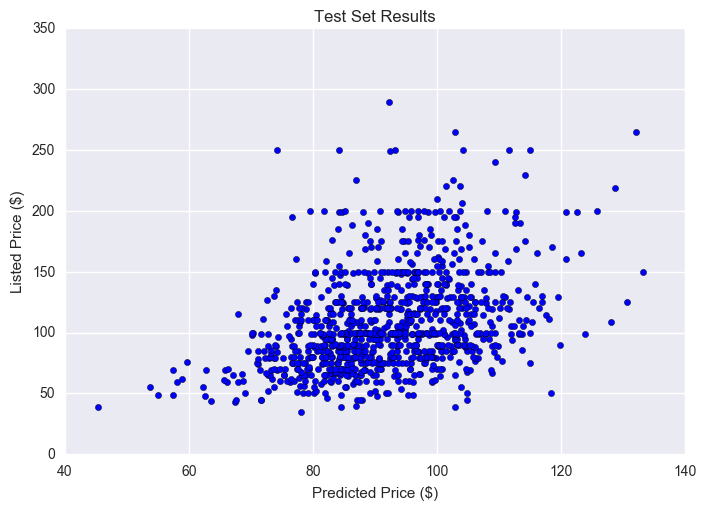

In [94]:
plt.scatter(df_SF.drop(train_rows)['pred_price'],df_SF.drop(train_rows)['price'])
plt.title('Test Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

In [95]:
x=df_SF.drop(train_rows)['pred_price']
y=df_SF.drop(train_rows)['corr_price']
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print(slope,intercept,r_value**2,p_value,std_err)

1.1669212558 -14.1059827831 0.180274192229 9.92329401594e-45 0.0790446077265


Feature ranking:
1. bin_num_beds (0.044334)
2. bin_guest_sat (0.033457)
3. bin_person_cap (0.032051)
4. bin_is_apt (0.028360)
5. bin_host_other_rev_count (0.025107)
6. amen_2 (0.024902)
7. amen_31 (0.024297)
8. bin_instant_book (0.024005)
9. bin_cleanliness_rating (0.023478)
10. amen_36 (0.023076)
11. amen_1 (0.022839)
12. bin_cancel_policy (0.022810)
13. bin_loc_rating (0.022678)
14. amen_50 (0.021758)
15. amen_37 (0.021676)
16. amen_42 (0.021589)
17. amen_41 (0.021245)
18. amen_3 (0.020491)
19. amen_9 (0.020246)
20. amen_47 (0.020034)
21. amen_49 (0.020024)
22. amen_44 (0.019971)
23. bin_value_rating (0.019817)
24. amen_39 (0.019639)
25. bin_review_count (0.018414)
26. amen_46 (0.018302)
27. bin_acc_rating (0.018272)
28. amen_43 (0.018270)
29. amen_45 (0.017987)
30. amen_8 (0.017966)
31. amen_34 (0.017942)
32. amen_38 (0.017749)
33. amen_30 (0.017319)
34. amen_28 (0.017170)
35. amen_33 (0.016816)
36. amen_16 (0.016670)
37. amen_17 (0.015478)
38. amen_40 (0.015309)
39. amen_27 (0.0148

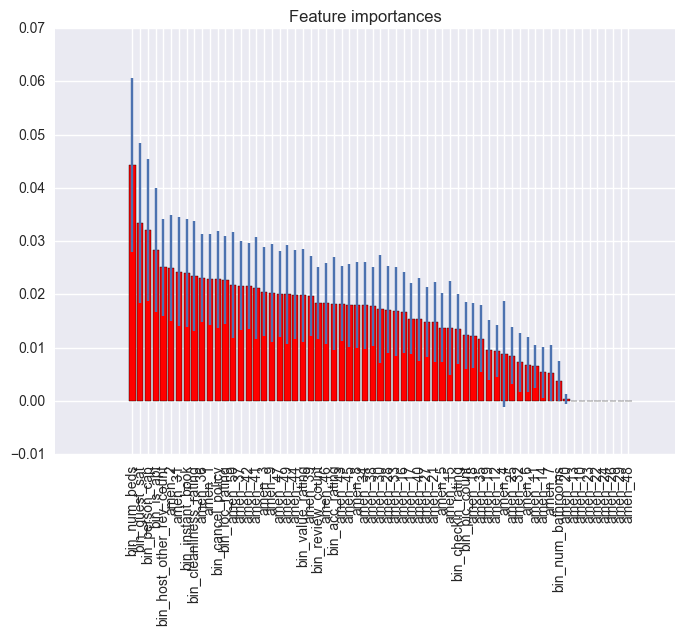

In [96]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
#num_feat=20
#indices=indices[:num_feat]
# Print the feature ranking
print("Feature ranking:")
importance_dict = {}
for f in range(X.shape[1]):
    print("%i. %s (%f)" % (f+1,featureList[indices[f]], importances[indices[f]]))
    importance_dict[featureList[indices[f]]] = importances[indices[f]]
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
      color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [featureList[i] for i in indices],rotation=90)
plt.show()

In [107]:
df.groupby('bin_num_beds').mean()['corr_price'][False]

89.947287868495224

In [143]:
derivs = {}
for feature in featureList:
    foo = df.groupby(feature).mean()['corr_price']
    bar = df.groupby(feature).count()['corr_price']
    if len(foo.index) == 2:
        if bar[True] > 1500 and bar[False] > 1500:
            derivs[feature] = abs(foo[True]-foo[False])/foo[False]

In [144]:
feat_names = []
feat_deriv = []
for key in sorted(derivs,key=derivs.get,reverse=True):
    feat_names.append(key)
    feat_deriv.append(derivs[key])
    print(key,derivs[key])

bin_loc_rating 0.163234151922
bin_cleanliness_rating 0.156229988445
bin_guest_sat 0.152472404266
amen_1 0.0798486844007
bin_value_rating 0.0741869842017
bin_host_other_rev_count 0.0741693399771
amen_31 0.069790126676
amen_50 0.0596118724503
amen_49 0.0576093418939
amen_37 0.0509965279352
amen_36 0.0462313773691
amen_9 0.0400791101915
amen_45 0.0355627434226
amen_39 0.0257934433949
amen_46 0.0214012091711
amen_47 0.00776961574012
amen_44 0.00142586644922


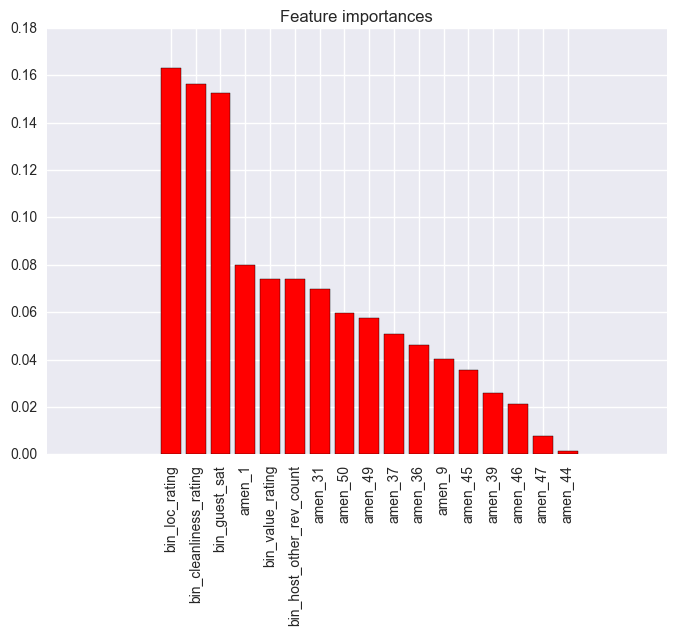

In [145]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(feat_names)), feat_deriv,
      color="r", align="center")
plt.xticks(range(len(feat_names)), feat_names,rotation=90)
plt.show()

In [139]:
amen_name_dict = joblib.load('static/amen_name_dict.pkl')
pprint.pprint(amen_name_dict)

{1: 'TV',
 2: 'Cable TV',
 3: 'Internet',
 4: 'Wireless Internet',
 5: 'Air conditioning',
 6: 'Wheelchair accessible',
 7: 'Pool',
 8: 'Kitchen',
 9: 'Free parking on premises',
 10: 'Paid parking off premises',
 11: 'Smoking allowed',
 12: 'Pets allowed',
 14: 'Doorman',
 15: 'Gym',
 16: 'Breakfast',
 21: 'Elevator in building',
 23: 'Free parking on street',
 25: 'Hot tub',
 27: 'Indoor fireplace',
 28: 'Buzzer/wireless intercom',
 30: 'Heating',
 31: 'Family/kid friendly',
 32: 'Suitable for events',
 33: 'Washer',
 34: 'Dryer',
 35: 'Smoke detector',
 36: 'Carbon monoxide detector',
 37: 'First aid kit',
 38: 'Safety card',
 39: 'Fire extinguisher',
 40: 'Essentials',
 41: 'Shampoo',
 42: 'Lock on bedroom door',
 43: '24-hour check-in',
 44: 'Hangers',
 45: 'Hair dryer',
 46: 'Iron',
 47: 'Laptop friendly workspace',
 56: 'Private living room',
 57: 'Private entrance'}


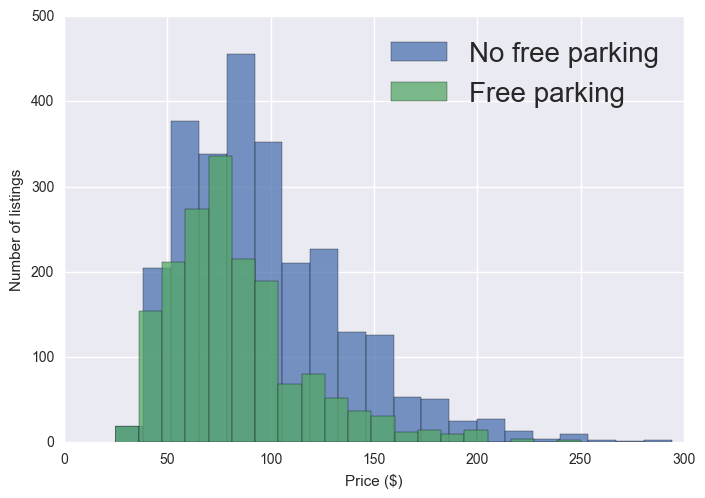

In [76]:
groups = df.groupby('amen_9')['price']
fig,ax=plt.subplots()
for k, v in groups:
    v.hist(label=str(k), alpha=.75, ax=ax,bins=20)
ax.legend()

leg=plt.legend()
leg.get_texts()[0].set_text('No free parking')
leg.get_texts()[1].set_text('Free parking')

plt.xlabel('Price ($)')
plt.ylabel('Number of listings')
params = {'axes.titlesize':40}
plt.rcParams.update(params)

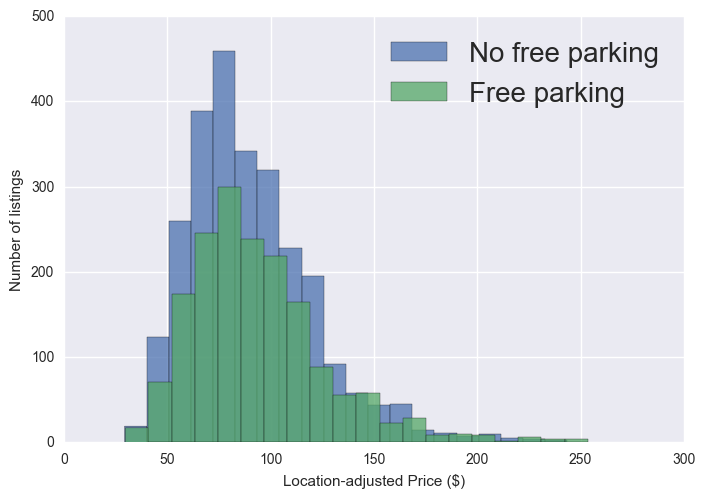

In [80]:
groups = df.groupby('amen_9')['corr_price']
fig,ax=plt.subplots()

for k, v in groups:
    v.hist(label=str(k), alpha=.75, ax=ax,bins=20)

ax.legend()
leg=plt.legend()

leg.get_texts()[0].set_text('No free parking')
leg.get_texts()[1].set_text('Free parking')
plt.xlabel('Location-adjusted Price ($)')
plt.ylabel('Number of listings')

params = {'axes.labelsize':'large'}
plt.rcParams.update(params)

In [52]:
df.groupby('amen_9').mean()[['price','corr_price']]

,price,corr_price
amen_9,,
False,97.428843,90.371478
True,83.247972,93.993486


In [54]:
(93.99-90.37)/90.37

0.04005754121943112

In [55]:
(83.25-97.43)/97.43

-0.14554038797085092